In [3]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:00:01


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb 
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
train = pd.read_csv('train_set.csv')
train = train.set_index('Date')
train.index = pd.to_datetime(train.index)
y_train = train['forward_return_3']
X_train = train.drop('forward_return_3', axis = 1)

In [12]:
validation = pd.read_csv('validation_set.csv')
validation = validation.set_index('Date')
validation.index = pd.to_datetime(validation.index)
y_validation = validation['forward_return_3']
X_validation = validation.drop('forward_return_3', axis = 1)

/var/folders/cn/ml3np26x7lx32rq6thnw223r0000gn/T/ipykernel_21475/2403728724.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  validation.index = pd.to_datetime(validation.index)


/Users/ryliu/anaconda3/envs/practice/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


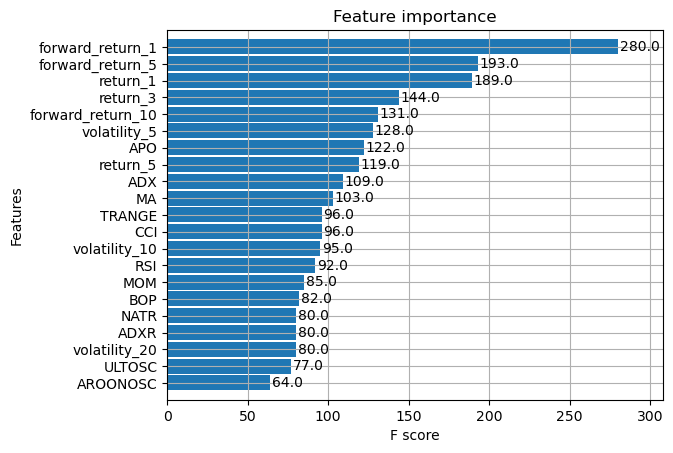

In [13]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_validation, y_validation)],
        early_stopping_rounds=50,
       verbose=False)

_ = plot_importance(reg, height=0.9)

In [15]:
test = pd.read_csv('test_set.csv')
test = test.set_index('Date')
test.index = pd.to_datetime(test.index)
y_test = test['forward_return_3']
X_test = test.drop('forward_return_3', axis = 1)

/var/folders/cn/ml3np26x7lx32rq6thnw223r0000gn/T/ipykernel_21475/3557303026.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  test.index = pd.to_datetime(test.index)


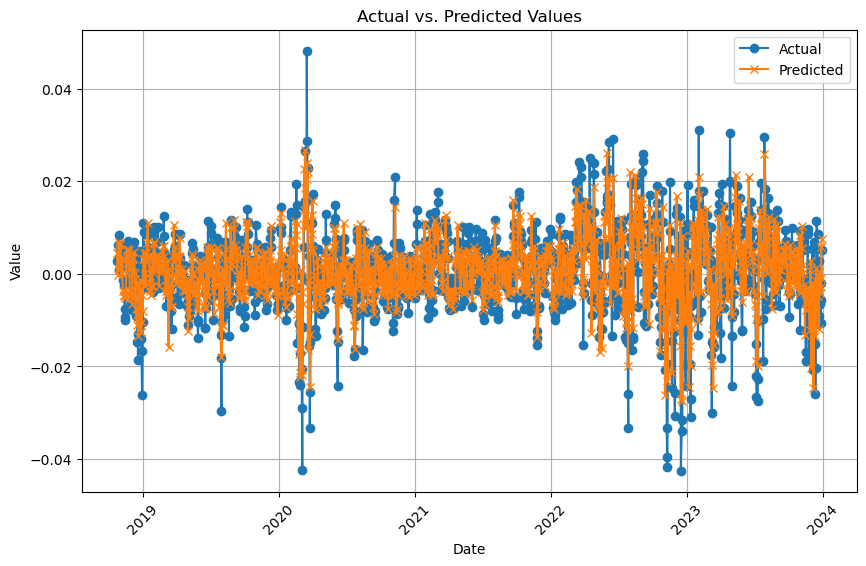

In [18]:

y_pred = reg.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual", marker='o')
plt.plot(y_test.index, y_pred, label="Predicted", marker='x')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs. Predicted Values")
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.show()

In [21]:

mean_squared_error(y_test,y_pred), mean_absolute_error(y_test,y_pred)

(3.598518933849467e-05, 0.0042144660284025364)

In [23]:
r2_score(y_test, y_pred, multioutput='variance_weighted')

0.5761594156229456